In [36]:
from dime.textual import levenshtein_distance, lc_subsequence_torch, str_exact_match
from dime.token_classification import proc_token_classification
from dime.geometric import iou
from dime.hed import hed
from dime.core import (get_iou_metrics, get_precision, get_recall, get_f1, \
                                    get_iou_label, get_weighted_mean, get_iou_metrics_df, \
                                        get_text_metrics,get_hed_document,get_hed_label)
import numpy as np
import matplotlib.pyplot as plt
%timeit
def show(x): 
    plt.imshow(x*x)
    plt.savefig('lcstable.png')
    

In [37]:
# ref = "he watched the boy with the binoculars"
# pred = "she watched the boy"
ref = "abc"
pred = "abb"
(tp, fp, fn),dp_table = lc_subsequence_torch(pred,ref,ret_dp_table=True)
(tp, fp, fn)

(2.0, 1.0, 1.0)

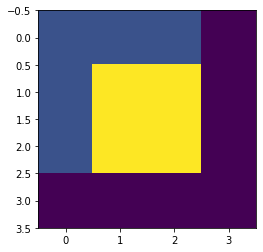

In [38]:
show(dp_table)

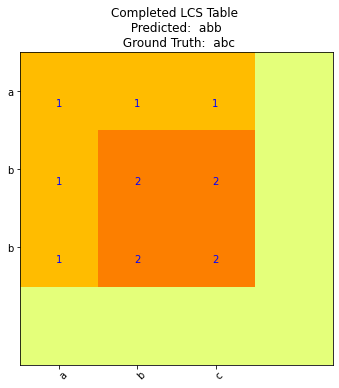

In [39]:
preds = list(pred)
refs = list(ref)
fig, ax = plt.subplots()
fig.set_size_inches(9.5, 5.5)
im = ax.imshow(dp_table,cmap='Wistia')

# We want to show all ticks...
ax.set_xticks(np.arange(len(refs)))
ax.set_yticks(np.arange(len(preds)))
# ... and label them with the respective list entries
ax.set_xticklabels(refs)
ax.set_yticklabels(preds)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(preds)):
    for j in range(len(refs)):
        text = ax.text(j, i, "\n"*2+str(int(dp_table[i, j])),
                       ha="center", va="center", color="b")

ax.set_title(f'Completed LCS Table \n Predicted:  {pred} \n Ground Truth:  {ref}')

fig.tight_layout()
plt.savefig('img/lcstable.png')
plt.show()

In [40]:
plt.savefig('lcstable.png')

<Figure size 432x288 with 0 Axes>

In [41]:
import numpy as np
mylist = np.array([1,2,3,4,5])

In [42]:
right = len(mylist)-1
mylist[right]

5

In [43]:
def longestCommonSubsequence(str1, str2):
    lcs = [[[] for x in range(len(str1)+1)] for y in range(len(str2)+1)] #memo
    